<a href="https://colab.research.google.com/github/EsterGM/Women-In-Tech/blob/main/final_computing_in_schools/CS_in_schools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Girls in computer science 

Aim is to analyse 


> 1. Gender distribution in CS across N5, Higher and Advanced Higher for years [2015:2019]
> 2. Line graph showing female intake in CS across years



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Advanced Higher


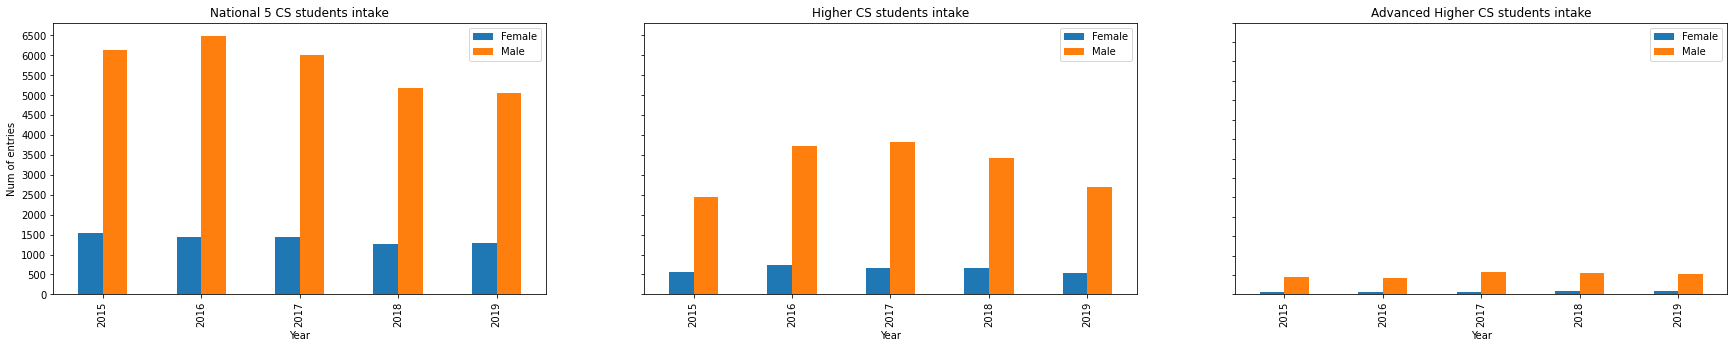

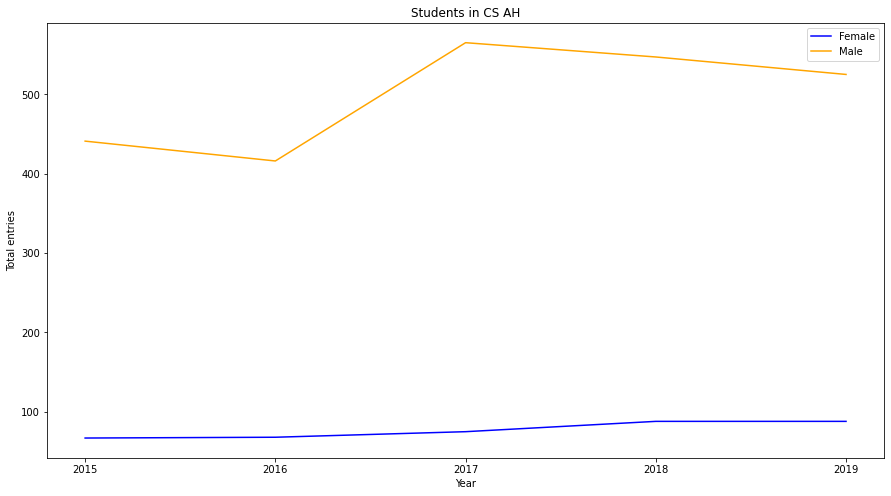

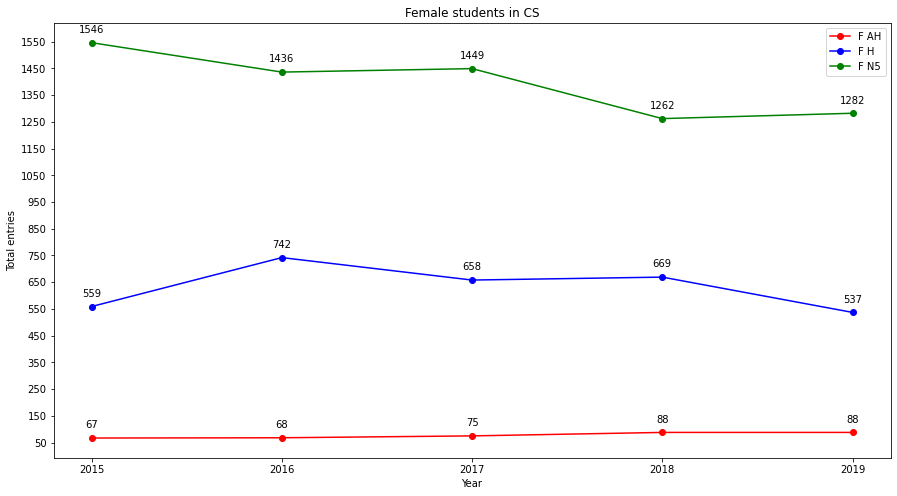

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_cnames = ['Subject', 'Total entries', 'Male percentage', 'Female percentage']
subject = 'Computing Science'
# The subject name was changed after 2015
subject_2015 = 'Computing'

def clean_data(df, ishigher_yr2015):
  
  # Data cleaning

  # Get 4 columns (there are no names, so use integer index)
  # Column 0 - Subject Title
  # Column 1 - Total number of entries
  # Column 2 - % of male
  # Column 3 - % of female
  df_c = df.iloc[:, 0:4]

  # Remove top 7 rows to get to data of interest
  # First entry should be Accounting

  #print(df_c.head(10))
  df_c.drop([0,1,2,3,4,5,6,7], inplace=True)
  df_c.reset_index(drop=True, inplace=True)
  
  #print(df_c.head(2))

  # Have meaningful column names to work with
  column_indices = [0,1,2,3]
  old_names = df_c.columns[column_indices]
  df_c.rename(columns=dict(zip(old_names, new_cnames)), inplace=True)

  # Get index of subject
  # For 2015, subject is 'Computing' for Higher and Advanced Higher
  if ishigher_yr2015 == True:
    subject_index = df_c[df_c['Subject']==subject_2015].index
    #print(f'Subject Index 2015')
    #print(subject_index)
  else:
    subject_index = df_c[df_c['Subject']==subject].index
    #print(f'Subject Index > 2015')
    #print(subject_index)

  # Get data for subject
  total_entries = df_c.loc[subject_index, 'Total entries']
  total_male = df_c.loc[subject_index, 'Male percentage'] * total_entries/100
  total_female = total_entries - total_male #df_n5_2019_1.loc[subject_index, 'Female percentage']

  return total_entries, total_male, total_female

def read_data_2019():
  # Read National5, Higher and Advanced Higher stats
  n5_path = 'https://github.com/njaincode/final_project/blob/9c105cecfd292f55e6fcee669d15b14297a9b53d/SQA_datasets/2019/ASR2019_National5.xls?raw=true'
  h_path = 'https://github.com/njaincode/final_project/blob/9c105cecfd292f55e6fcee669d15b14297a9b53d/SQA_datasets/2019/ASR2019_Higher.xls?raw=true'
  ah_path = 'https://github.com/njaincode/final_project/blob/9c105cecfd292f55e6fcee669d15b14297a9b53d/SQA_datasets/2019/ASR2019_AdvancedHigher.xls?raw=true'

  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  # The header is not in first row but row 8th instead
  df_n5 = pd.read_excel(n5_path, sheet_name=sheet_name, header=None)
  df_h = pd.read_excel(h_path, sheet_name=sheet_name, header=None)
  df_ah = pd.read_excel(ah_path, sheet_name=sheet_name, header=None)
  
  return df_n5, df_h, df_ah
  
def read_data_2018():
  # Read National5, Higher and Advanced Higher stats
  n5_path = 'https://github.com/njaincode/final_project/blob/9c105cecfd292f55e6fcee669d15b14297a9b53d/SQA_datasets/2018/ASR2018_National5.xls?raw=true'
  h_path = 'https://github.com/njaincode/final_project/blob/9c105cecfd292f55e6fcee669d15b14297a9b53d/SQA_datasets/2018/ASR2018_Higher.xls?raw=true'
  ah_path = 'https://github.com/njaincode/final_project/blob/9c105cecfd292f55e6fcee669d15b14297a9b53d/SQA_datasets/2018/ASR2018_AdvancedHigher.xls?raw=true'

  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  # The header is not in first row but row 8th instead
  df_n5 = pd.read_excel(n5_path, sheet_name=sheet_name, header=None)
  df_h = pd.read_excel(h_path, sheet_name=sheet_name, header=None)
  df_ah = pd.read_excel(ah_path, sheet_name=sheet_name, header=None)
  
  return df_n5, df_h, df_ah
  
def read_data_2017():
  # Read National5, Higher and Advanced Higher stats
  n5_path = 'https://github.com/njaincode/final_project/blob/9c105cecfd292f55e6fcee669d15b14297a9b53d/SQA_datasets/2017/ASR2017_National5.xls?raw=true'
  h_path = 'https://github.com/njaincode/final_project/blob/9c105cecfd292f55e6fcee669d15b14297a9b53d/SQA_datasets/2017/ASR2017_Higher.xls?raw=true'
  ah_path = 'https://github.com/njaincode/final_project/blob/9c105cecfd292f55e6fcee669d15b14297a9b53d/SQA_datasets/2017/ASR2017_AdvancedHigher.xls?raw=true'

  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  # The header is not in first row but row 8th instead
  df_n5 = pd.read_excel(n5_path, sheet_name=sheet_name,header=None)
  df_h = pd.read_excel(h_path, sheet_name=sheet_name,header=None)
  df_ah = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  return df_n5, df_h, df_ah
  
def read_data_2016():
  # Read National5, Higher and Advanced Higher stats
  n5_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_National5.xls?raw=true'
  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_Higher.xls?raw=true'
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_AdvancedHigher.xls?raw=true'

  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  # The header is not in first row but row 8th instead
  df_n5 = pd.read_excel(n5_path, sheet_name=sheet_name,header=None)
  df_h = pd.read_excel(h_path, sheet_name=sheet_name,header=None)
  df_ah = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  return df_n5, df_h, df_ah
  
def read_data_2015():
  # Read National5, Higher and Advanced Higher stats
  n5_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_National5.xls?raw=true'
  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_Higher.xls?raw=true'
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_AdvancedHigher.xls?raw=true'
  # There has been some changes to exam levels in this year
  new_h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_NewHigher.xls?raw=true'

  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  # The header is not in first row but row 8th instead
  df_n5 = pd.read_excel(n5_path, sheet_name=sheet_name,header=None)
  df_h = pd.read_excel(h_path, sheet_name=sheet_name,header=None)
  df_ah = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  return df_n5, df_h, df_ah
  
def prepare_n5_data(df_n5_2015, df_n5_2016, df_n5_2017, df_n5_2018, df_n5_2019, ishigher):
     
  # Data cleaning
  total_entries_2019, total_male_2019, total_female_2019 = clean_data(df_n5_2019, False)
  total_entries_2018, total_male_2018, total_female_2018 = clean_data(df_n5_2018, False)
  total_entries_2017, total_male_2017, total_female_2017 = clean_data(df_n5_2017, False)
  total_entries_2016, total_male_2016, total_female_2016 = clean_data(df_n5_2016, False)
  if ishigher == True:
    total_entries_2015, total_male_2015, total_female_2015 = clean_data(df_n5_2015, ishigher_yr2015=True)
  else:
    total_entries_2015, total_male_2015, total_female_2015 = clean_data(df_n5_2015, ishigher_yr2015=False)

  # Data prep
  df_years = pd.DataFrame(columns = ['Total', 'Male', 'Female'], index = [2015, 2016, 2017, 2018, 2019])
  
  df_years['Total']   =  [total_entries_2015, total_entries_2016, total_entries_2017, total_entries_2018, total_entries_2019]
  df_years['Male']    =  [total_male_2015, total_male_2016, total_male_2017, total_male_2018, total_male_2019]
  df_years['Female']  =  [total_female_2015, total_female_2016, total_female_2017, total_female_2018, total_female_2019]
  
  # Change to numerical value
  df_years['Total'] = df_years['Total'].astype(int)
  df_years['Male'] = df_years['Male'].astype(int)
  df_years['Female'] = df_years['Female'].astype(int)

  #print(df_years)
  return(df_years)
  
def main_function():
  # Setup some display options
  pd.options.display.max_columns= 2
  pd.options.display.max_rows= 30

  # Fetch data
  df_n5_2019, df_h_2019, df_ah_2019 = read_data_2019()
  df_n5_2018, df_h_2018, df_ah_2018 = read_data_2018()
  df_n5_2017, df_h_2017, df_ah_2017 = read_data_2017()
  df_n5_2016, df_h_2016, df_ah_2016 = read_data_2016()
  df_n5_2015, df_h_2015, df_ah_2015 = read_data_2015()
  
  n5 = prepare_n5_data(df_n5_2015, df_n5_2016, df_n5_2017, df_n5_2018, df_n5_2019, False)
  
  #xaxis = [2015, 2016, 2017, 2018, 2019]
  #n5_plot.plot(kind='bar', title='National 5 CS students intake', ylabel='Num of entries', xlabel='Year', figsize=(6, 5), stacked=True)
  #plt.plot(xaxis, n5['Female'], color='red', marker='o')
     
  higher = prepare_n5_data(df_h_2015, df_h_2016, df_h_2017, df_h_2018, df_h_2019, ishigher=True)
  
  #higher_plot.plot(kind='bar', title='Higher CS students intake', ylabel='Num of entries', xlabel='Year', figsize=(6, 5), stacked=True)
  #plt.plot(xaxis, higher['Female'], color='blue', marker='o')

  #print(f'Advanced Higher')
  ahigher = prepare_n5_data(df_ah_2015, df_ah_2016, df_ah_2017, df_ah_2018, df_ah_2019, ishigher=True)
  
  #ahigher_plot.plot(kind='bar', title='Advanced Higher CS students intake', ylabel='Num of entries', xlabel='Year', figsize=(6, 5), stacked=True)

  # Plot side-by-side
  xaxis = [2015, 2016, 2017, 2018, 2019]
  
  n5_plot = n5[['Female', 'Male']]
  higher_plot = higher[['Female', 'Male']]
  ahigher_plot = ahigher[['Female', 'Male']]

  fig, ax = plt.subplots(1, 3, figsize=(30,5), sharey=True, sharex=True)
  n5_plot.plot(kind='bar', title='National 5 CS students intake', ylabel='Num of entries', xlabel='Year', ax=ax[0])
  higher_plot.plot(kind='bar', title='Higher CS students intake', ylabel='Num of entries', xlabel='Year', ax=ax[1])
  ahigher_plot.plot(kind='bar', title='Advanced Higher CS students intake', ylabel='Num of entries', xlabel='Year', ax=ax[2])

  ax[2].legend(loc="upper right")
  
  # Control y-axis, step size=500
  major_ticks = np.arange(0, 7001, 500)
  ax[2].set_yticks(major_ticks)
  plt.show()

  # Example to draw line graph
  fig, ax = plt.subplots(1, 1, figsize=(15, 8))
  xtry = xaxis

  ytry1 = ahigher['Female']
  ytry2 = ahigher['Male']
  ax.set_xticks(xtry)
  ax.set_title('Students in CS AH')
  ax.plot(xtry, ytry1, color='blue', label='Female')
  ax.plot(ytry2, color='orange', label='Male')
  ax.set_xlabel('Year')
  ax.set_ylabel('Total entries')
  ax.legend()
 
  plt.show()

  # Show trend of female in CS for years 2015:2019 for N5, H and AH
  fig, ax = plt.subplots(1, 1, figsize=(15, 8))
  x = [2015, 2016, 2017, 2018, 2019]
  y1 = ahigher['Female']
  y2 = higher['Female']
  y3 = n5['Female']
  ax.set_xticks(x)
  ax.set_yticks(np.arange(50, 1800, 100))
  ax.set_title('Female students in CS')
  ax.plot(x, y1, 'ro-', label='F AH')
  ax.plot(y2, 'bo-', label='F H')
  ax.plot(y3, 'go-', label='F N5')
  ax.set_xlabel('Year')
  ax.set_ylabel('Total entries')
  ax.legend()
 
  for x,y,z,a in zip(x,y1,y2,y3):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    label = "{:.0f}".format(z)
    plt.annotate(label, (x,z), textcoords="offset points", xytext=(0,10), ha='center')
    label = "{:.0f}".format(a)
    plt.annotate(label, (x,a), textcoords="offset points", xytext=(0,10), ha='center')
   
  plt.show()


main_function()


# Compare grades of girls vs boys in CS in Advanced Higher



> The plot shows female outperform male in CS.



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ValueError: ignored

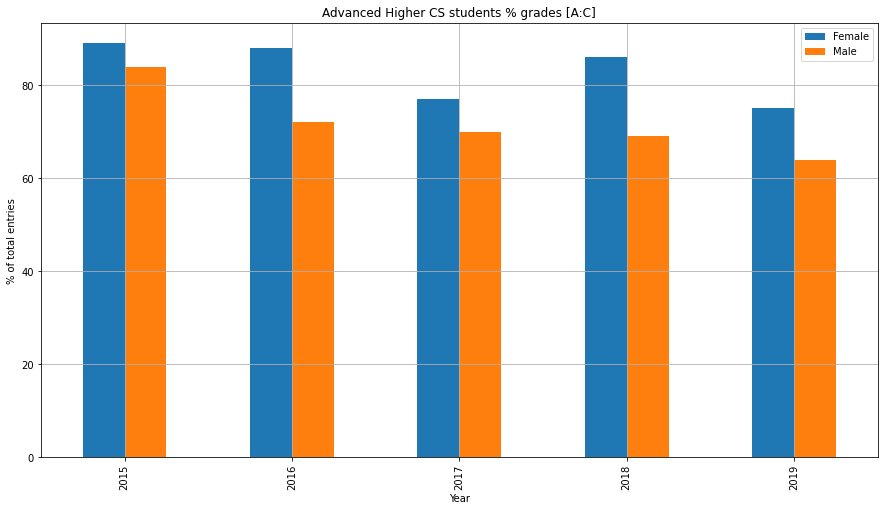

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_cnames = ['Subject', 'Total entries', 'Male percentage', 'Female percentage']
subject = 'Computing Science'
subject_2015 = 'Computing'

def read_data_ah():
  # Read Advanced Higher stats for years [2015:2019]
  # Can there be an array of df?
  
  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_AdvancedHigher.xls?raw=true'
  # The header is not in first row but row 8th instead
  df_15 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_AdvancedHigher.xls?raw=true'
  df_16 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2017/ASR2017_AdvancedHigher.xls?raw=true'
  df_17 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2018/ASR2018_AdvancedHigher.xls?raw=true'
  df_18 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2019/ASR2019_AdvancedHigher.xls?raw=true'
  df_19 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
 
  return df_15, df_16, df_17, df_18, df_19
  
def clean_data(df, ishigher_yr15, isyr19):
  
  # Data cleaning

  # Get 4 columns (there are no names, so use integer index)
  # Column 0 - Subject Title
  # Column 1 - Total number of entries
  # Column 2 - % of boys
  # Column 3 - % of girls
  # Column 10 - % of boys with graded A-C
  # Column 11 - % of girls with graded A-C
  #print(df.columns)
  if isyr19 == True:
    # From year 2019 there are more columns for unknown and NA
    df_c = df.iloc[:, [0,1,2,3,10,11]]
  else:
    df_c = df.iloc[:, [0,1,2,3,6,7]]

  # Remove top 7 rows to get to data of interest
  # First entry should be Accounting
  df_c.drop([0,1,2,3,4,5,6,7], inplace=True)
  df_c.reset_index(drop=True, inplace=True)
  
  # Have meaningful column names to work with
  column_indices = [0,1,4,5]
  old_names = df_c.columns[column_indices]
  df_c.rename(columns=dict(zip(old_names, new_cnames)), inplace=True)

  # Get index of subject
  # For 2015, subject is 'Computing' for Higher and Advanced Higher
  if ishigher_yr15 == True:
    subject_index = df_c[df_c['Subject']==subject_2015].index
    #print(f'Subject Index 2015')
    #print(subject_index)
  else:
    subject_index = df_c[df_c['Subject']==subject].index
    #print(f'Subject Index > 2015')
    #print(subject_index)

  # Get data for subject
  total_entries = df_c.loc[subject_index, 'Total entries']
  # To show the comparison, its better to show %age of girls with higher grades rather than total number
  total_male = df_c.loc[subject_index, 'Male percentage']
  total_female = df_c.loc[subject_index, 'Female percentage']
  
  return total_entries, total_male, total_female

def prepare_data(df_15, df_16, df_17, df_18, df_19, ishigher):
     
  # Data cleaning
  total_entries_2019, total_male_2019, total_female_2019 = clean_data(df_19, False, isyr19=True)
  total_entries_2018, total_male_2018, total_female_2018 = clean_data(df_18, False, False)
  total_entries_2017, total_male_2017, total_female_2017 = clean_data(df_17, False, False)
  total_entries_2016, total_male_2016, total_female_2016 = clean_data(df_16, False, False)
  if ishigher == True:
    total_entries_2015, total_male_2015, total_female_2015 = clean_data(df_15, ishigher_yr15=True, isyr19=False)
  else:
    total_entries_2015, total_male_2015, total_female_2015 = clean_data(df_15, ishigher_yr15=False, isyr19=False)

  # Data prep
  df_years = pd.DataFrame(columns = ['% of total', 'Male', 'Female'], index = [2015, 2016, 2017, 2018, 2019])
  
  df_years['% of total'] =   [total_entries_2015, total_entries_2016, total_entries_2017, total_entries_2018, total_entries_2019]
  df_years['Male'] =    [total_male_2015, total_male_2016, total_male_2017, total_male_2018, total_male_2019]
  df_years['Female'] =  [total_female_2015, total_female_2016, total_female_2017, total_female_2018, total_female_2019]
  
  # Change to numerical value
  df_years['% of total'] = df_years['% of total'].astype(int)
  df_years['Male'] = df_years['Male'].astype(int)
  df_years['Female'] = df_years['Female'].astype(int)

  return(df_years)

def main_function():
  # Setup some display options
  pd.options.display.max_columns= 10
  pd.options.display.max_rows= 30

  # Fetch data
  df_ah_2015, df_ah_2016, df_ah_2017, df_ah_2018, df_ah_2019 = read_data_ah()
  
  ahigher = prepare_data(df_ah_2015, df_ah_2016, df_ah_2017, df_ah_2018, df_ah_2019, ishigher=True)
  
  xaxis = [2015, 2016, 2017, 2018, 2019]
  ahigher_plot = ahigher[['Female', 'Male']]

  fig, ax = plt.subplots(1, 1, figsize=(15,8))
  ahigher_plot.plot(kind='bar', title='Advanced Higher CS students % grades [A:C]', ylabel='% of total entries', xlabel='Year', ax=ax)
  ax.legend(loc="upper right")
  ax.grid(zorder=0)
  # FIXME ax.bar(range(len(ahigher_plot)), ahigher_plot, width=0.3, align='center', color='skyblue', zorder=3)

  plt.show()

main_function()


In [ ]:
tbd

# Subject distribution across N5, H & AH

For clarity of data, languages are removed and only core STEM related subjects are used for analysis.
> The plot shows trend of subjects taken by male and female in AH. It shows less participation of female in STEM subjects.

In [ ]:
# Get girls percentage in soi (subjects of interest) from years [2015:2019] across N5, H & AH and plot line graph for 3 levels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_cnames = ['Subject', 'Total entries', 'Male percentage', 'Female percentage']
subject_lang = ['Latin', 'German', 'Spanish', 'French', 'English', 'Italian', 'Gaelic (Learners)', 'Gàidhlig', 'Chinese Languages', 'Physical Education']
# Subjects of interest (add all STEM related)
soi = ['Mathematics', 'Physics', 'Business Management', 'Computing Science', 'Engineering Science', 'Graphic Communication', 'Mathematics of Mechanics', 'Statistics']

def read_data_ah():
  # Read Advanced Higher stats for years [2015:2019]
  # Can there be an array of df?
  
  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_AdvancedHigher.xls?raw=true'
  # The header is not in first row but in 8th row instead
  df_15 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_AdvancedHigher.xls?raw=true'
  df_16 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2017/ASR2017_AdvancedHigher.xls?raw=true'
  df_17 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2018/ASR2018_AdvancedHigher.xls?raw=true'
  df_18 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2019/ASR2019_AdvancedHigher.xls?raw=true'
  df_19 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
 
  return df_15, df_16, df_17, df_18, df_19

def read_data_h():
  # Read Higher stats for years [2015:2019]
  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2019/ASR2019_Higher.xls?raw=true'
  # The header is not in first row but in 8th row instead
  df_19 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2018/ASR2018_Higher.xls?raw=true'
  df_18 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2017/ASR2017_Higher.xls?raw=true'
  df_17 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_Higher.xls?raw=true'
  df_16 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_Higher.xls?raw=true'
  df_15 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)
  # There has been some changes to exam levels in this year
  new_h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_NewHigher.xls?raw=true'
  df_15a = pd.read_excel(h_path, sheet_name=sheet_name,header=None)
  return df_15, df_16, df_17, df_18, df_19

def read_data_n5():
  # Read N5 stats for years [2015:2019]
  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2019/ASR2019_National5.xls?raw=true'
  # The header is not in first row but in 8th row instead
  df_19 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2018/ASR2018_National5.xls?raw=true'
  df_18 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2017/ASR2017_National5.xls?raw=true'
  df_17 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_National5.xls?raw=true'
  df_16 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_National5.xls?raw=true'
  df_15 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)
  return df_15, df_16, df_17, df_18, df_19
  
 def clean_data(df, ishigher_yr15, isyr19):
  
  # Data cleaning

  # Get 4 columns (there are no names, so use integer index)
  # Column 0 - Subject Title
  # Column 1 - Total number of entries
  # Column 2 - % of boys
  # Column 3 - % of girls
  
  #print(df.columns)
  if isyr19 == True:
    # From year 2019 there are more columns for unknown and NA
    df_c = df.iloc[:, [0,1,2,3]]
  else:
    df_c = df.iloc[:, [0,1,2,3]]

  # Remove top 8 rows to get to data of interest
  # First entry should be Accounting
  df_c.drop([0,1,2,3,4,5,6,7], inplace=True)
  df_c.reset_index(drop=True, inplace=True)
  
  # Have meaningful column names to work with
  column_indices = [0,1,2,3]
  old_names = df_c.columns[column_indices]
  df_c.rename(columns=dict(zip(old_names, new_cnames)), inplace=True)

  # Removed NA e.g. row 9 is empty
  df_c.dropna(inplace=True)
  df_c.reset_index(drop=True, inplace=True)

  # Remove Totals row
  # It happens to be the last, so just select all except last
  df_c = df_c[:-1]
  return df_c

def prepare_data(df_15, df_16, df_17, df_18, df_19, ishigher):
     
  # Data cleaning (dfc = dataframecleaned)
  dfc_19 = clean_data(df_19, False, isyr19=True)
  dfc_18 = clean_data(df_18, False, False)
  dfc_17 = clean_data(df_17, False, False)
  dfc_16 = clean_data(df_16, False, False)
  if ishigher == True:
    dfc_15 = clean_data(df_15, ishigher_yr15=True, isyr19=False)
  else:
    dfc_15 = clean_data(df_15, ishigher_yr15=False, isyr19=False)

  # Arrange df in descending order to find more popular subjects
  dfc_19.sort_values(by = ["Female"], ascending = [False], inplace=True)
  dfc_18.sort_values(by = ["Female"], ascending = [False], inplace=True)
  dfc_17.sort_values(by = ["Female"], ascending = [False], inplace=True)
  dfc_16.sort_values(by = ["Female"], ascending = [False], inplace=True)
  dfc_15.sort_values(by = ["Female"], ascending = [False], inplace=True)

  return(dfc_15, dfc_16, dfc_17, dfc_18, dfc_19)

def main_function():
  # Setup some display options
  pd.options.display.max_columns= 10
  pd.options.display.max_rows= 50

  # Fetch data
  df_ah_2015, df_ah_2016, df_ah_2017, df_ah_2018, df_ah_2019 = read_data_ah()
  dfc_15, dfc_16, dfc_17, dfc_18, dfc_19 = prepare_data(df_ah_2015, df_ah_2016, df_ah_2017, df_ah_2018, df_ah_2019, ishigher=True)
    
  # Higher
  df_h_2015, df_h_2016, df_h_2017, df_h_2018, df_h_2019 = read_data_h()
  dfch_15, dfch_16, dfch_17, dfch_18, dfch_19 = prepare_data(df_h_2015, df_h_2016, df_h_2017, df_h_2018, df_h_2019, ishigher=True)

  # N5
  df_n_2015, df_n_2016, df_n_2017, df_n_2018, df_n_2019 = read_data_n5()
  dfcn_15, dfcn_16, dfcn_17, dfcn_18, dfcn_19 = prepare_data(df_n_2015, df_n_2016, df_n_2017, df_n_2018, df_n_2019, ishigher=False)

  #print(dfc_19.head(5))
  # Plot - x=subjects, y=number of female students
  #xaxis = dfc_19['Subject']
  #yaxis = dfc_19['Female']
  ahigher_plot = dfc_19[['Subject', 'Female', 'Male']]
  p2 = dfc_19[['Subject', 'Female percentage', 'Male percentage']]
  
  # Set index as subject, it eases in plotting
  ahigher_plot.set_index('Subject', inplace=True)
  
  #print(p2['Subject'])
  p2.set_index('Subject', inplace=True)
  
  # Remove language subjects
  p2 = p2.drop(index=subject_lang, axis=0)
  p2.sort_values(by = ["Female percentage"], ascending = [False], inplace=True)
    
  fig, ax = plt.subplots(1, 1, figsize=(25,15))
  #ahigher_plot.plot(kind='bar', title='Girls subject intake in Advanced Higher', ylabel='Total intake', xlabel='Subject', ax=ax[0])
  #ax[0].legend(loc="upper right")
  # Control y-axis, step size=100
  major_ticks = np.arange(0, 2500, 100)
  #ax[0].set_yticks(major_ticks)
  p2.plot(kind='bar', title='Gender wise (%) subject distribution in Advanced Higher', ylabel='Percent', xlabel='Subject', ax=ax[1])
  plt.show()
  
  # Show another graph with Technology subjects or STEM subjects?
  ah_p2 = ahigher_plot.loc[soi]
  
  fig, ax = plt.subplots(1, 1, figsize=(15,8))
  ax.legend(loc="upper right")
  major_ticks = np.arange(0, 2500, 100)
  ax.set_yticks(major_ticks)
  ah_p2.plot(kind='bar', title='STEM intake in Advanced Higher', ylabel='Total intake', xlabel='Subject', ax=ax)
  plt.show()
  

main_function()

1. Show total entries in all subjects
2. Show popular subjects for boys and girls

After looking at different plots, it seems better to plot percentage numbers rather than actual number of boys and girls. Arranging data from most populus subjects for girls is visually more appealing.

TODO : Possible to show trend of STEM subjects % from N5 -> H -> AH?

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWi

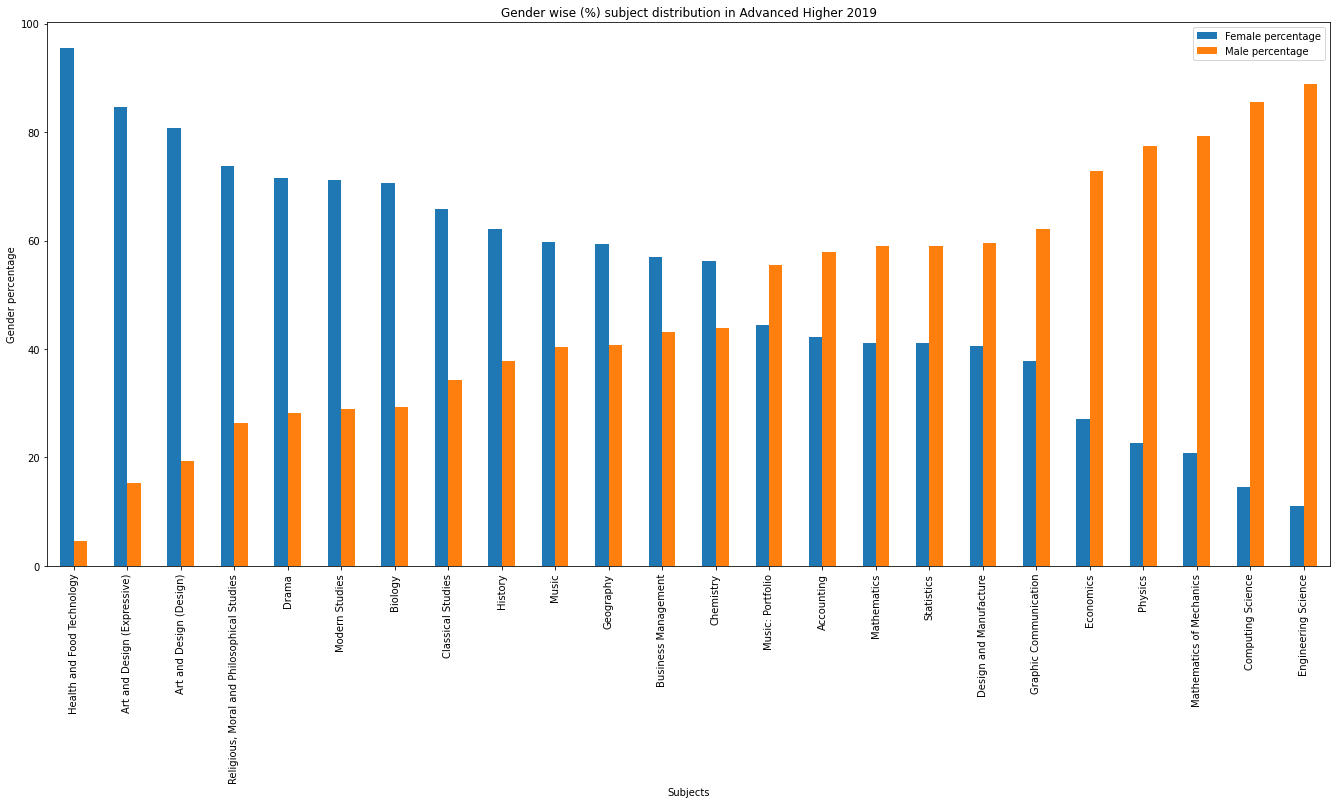

No handles with labels found to put in legend.


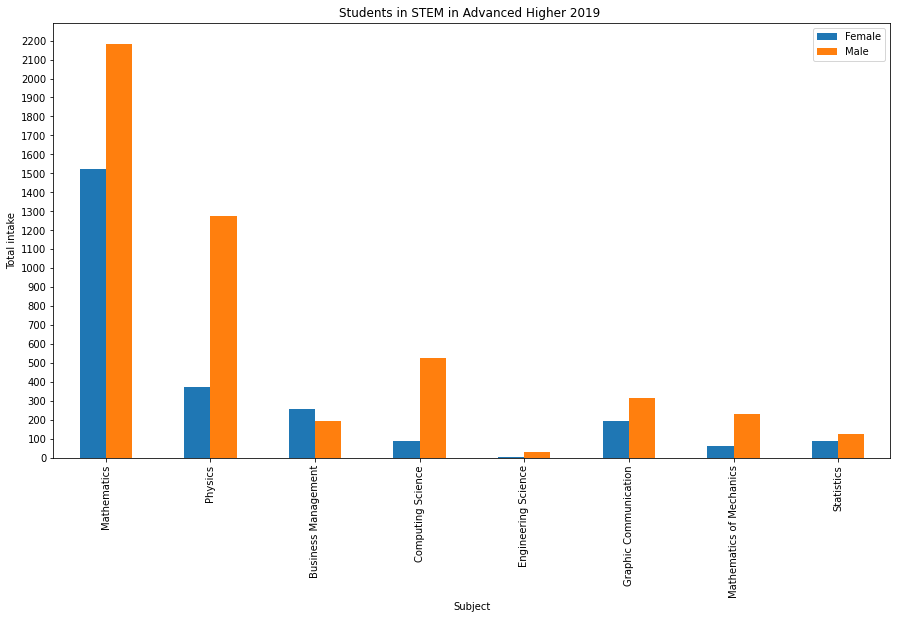

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

new_cnames = ['Subject', 'Total entries', 'Male percentage', 'Female percentage']
subject_lang = ['Latin', 'German', 'Spanish', 'French', 'English', 'Italian', 'Gaelic (Learners)', 'Gàidhlig', 'Chinese Languages', 'Physical Education']
# Subjects of interest (add all STEM related)
soi = ['Mathematics', 'Physics', 'Business Management', 'Computing Science', 'Engineering Science', 'Graphic Communication', 'Mathematics of Mechanics', 'Statistics']

def read_data_ah():
  # Read Advanced Higher stats for years [2015:2019]
    
  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_AdvancedHigher.xls?raw=true'
  # The header is not in first row but in 8th row instead
  df_15 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_AdvancedHigher.xls?raw=true'
  df_16 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2017/ASR2017_AdvancedHigher.xls?raw=true'
  df_17 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2018/ASR2018_AdvancedHigher.xls?raw=true'
  df_18 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2019/ASR2019_AdvancedHigher.xls?raw=true'
  df_19 = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
 
  return df_15, df_16, df_17, df_18, df_19

def read_data_h():
  # Read Higher stats for years [2015:2019]
  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2019/ASR2019_Higher.xls?raw=true'
  # The header is not in first row but in 8th row instead
  df_19 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2018/ASR2018_Higher.xls?raw=true'
  df_18 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2017/ASR2017_Higher.xls?raw=true'
  df_17 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_Higher.xls?raw=true'
  df_16 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_Higher.xls?raw=true'
  df_15 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)
  # There has been some changes to exam levels in this year
  new_h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_NewHigher.xls?raw=true'
  df_15a = pd.read_excel(h_path, sheet_name=sheet_name,header=None)
  return df_15, df_16, df_17, df_18, df_19

def read_data_n5():
  # Read N5 stats for years [2015:2019]
  # Read sheet name = Table 5
  sheet_name = 'Table 5'

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2019/ASR2019_National5.xls?raw=true'
  # The header is not in first row but in 8th row instead
  df_19 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2018/ASR2018_National5.xls?raw=true'
  df_18 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2017/ASR2017_National5.xls?raw=true'
  df_17 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2016/ASR2016_National5.xls?raw=true'
  df_16 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)

  h_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2015/ASR2015_National5.xls?raw=true'
  df_15 = pd.read_excel(h_path, sheet_name=sheet_name,header=None)
  return df_15, df_16, df_17, df_18, df_19
  
def clean_data(df, ishigher_yr15, isyr19):
  
  # Data cleaning

  # Get 4 columns (there are no names, so use integer index)
  # Column 0 - Subject Title
  # Column 1 - Total number of entries
  # Column 2 - % of boys
  # Column 3 - % of girls
  
  #print(df.columns)
  if isyr19 == True:
    # From year 2019 there are more columns for unknown and NA
    df_c = df.iloc[:, [0,1,2,3]]
  else:
    df_c = df.iloc[:, [0,1,2,3]]

  # Remove top 7 rows to get to data of interest
  # First entry should be Accounting
  df_c.drop([0,1,2,3,4,5,6,7], inplace=True)
  df_c.reset_index(drop=True, inplace=True)
  
  # Have meaningful column names to work with
  column_indices = [0,1,2,3]
  old_names = df_c.columns[column_indices]
  df_c.rename(columns=dict(zip(old_names, new_cnames)), inplace=True)

  # Removed NA e.g. row 9 is empty
  df_c.dropna(inplace=True)
  df_c.reset_index(drop=True, inplace=True)

  # Remove Totals row
  # FIXME index will only work if Subjects is used as index, how to do that?
  #df_c = df_c.set_index("Subject")
  #df_c = df_c.drop(index=["Totals"])
  # It happens to be the last, so just select all except last
  df_c = df_c[:-1]
 
  # Create new data set with percentage values replaced with actual numbers
  df_c['Male'] = df_c['Male percentage'] * df_c['Total entries']/100
  df_c['Female'] = df_c['Female percentage'] * df_c['Total entries']/100
  
  return df_c

def prepare_data(df_15, df_16, df_17, df_18, df_19, ishigher):
     
  # Data cleaning (dfc = dataframecleaned)
  dfc_19 = clean_data(df_19, False, isyr19=True)
  dfc_18 = clean_data(df_18, False, False)
  dfc_17 = clean_data(df_17, False, False)
  dfc_16 = clean_data(df_16, False, False)
  if ishigher == True:
    dfc_15 = clean_data(df_15, ishigher_yr15=True, isyr19=False)
  else:
    dfc_15 = clean_data(df_15, ishigher_yr15=False, isyr19=False)

  # Arrange df in descending order to find more popular subjects
  dfc_19.sort_values(by = ["Female"], ascending = [False], inplace=True)
  dfc_18.sort_values(by = ["Female"], ascending = [False], inplace=True)
  dfc_17.sort_values(by = ["Female"], ascending = [False], inplace=True)
  dfc_16.sort_values(by = ["Female"], ascending = [False], inplace=True)
  dfc_15.sort_values(by = ["Female"], ascending = [False], inplace=True)

  # Data prep
  df_years = pd.DataFrame(columns = ['% of total', 'Male', 'Female'], index = [2015, 2016, 2017, 2018, 2019])
  return(dfc_15, dfc_16, dfc_17, dfc_18, dfc_19)

def main_function():
  # Setup some display options
  pd.options.display.max_columns= 10
  pd.options.display.max_rows= 50

  # Fetch data for AH for years [2015:2019]
  df_ah_2015, df_ah_2016, df_ah_2017, df_ah_2018, df_ah_2019 = read_data_ah()
  
  # Arrange df with most popular subjects at top for female
  dfc_15, dfc_16, dfc_17, dfc_18, dfc_19 = prepare_data(df_ah_2015, df_ah_2016, df_ah_2017, df_ah_2018, df_ah_2019, ishigher=True)
  
  #print(dfc_19.head(5))
  # Plot - x=subjects, y=number of female students
  #xaxis = dfc_19['Subject']
  #yaxis = dfc_19['Female']
  ahigher_plot = dfc_19[['Subject', 'Female', 'Male']]
  p2 = dfc_19[['Subject', 'Female percentage', 'Male percentage']]
  
  # Set index as subject, it eases plotting
  ahigher_plot.set_index('Subject', inplace=True)
  
  #print(p2['Subject'])
  p2.set_index('Subject', inplace=True)
  
  # Remove language subjects
  p2 = p2.drop(index=subject_lang, axis=0)
  p2.sort_values(by = ["Female percentage"], ascending = [False], inplace=True)
      
  fig, ax = plt.subplots(1, 1, figsize=(23,10))
  #ahigher_plot.plot(kind='bar', title='Girls subject intake in Advanced Higher', ylabel='Total intake', xlabel='Subject', ax=ax[0])
  #ax[0].legend(loc="upper right")
  # Control y-axis, step size=100
  major_ticks = np.arange(0, 2500, 100)
  #ax[0].set_yticks(major_ticks)
  p2.plot(kind='bar', title='Gender wise (%) subject distribution in Advanced Higher 2019', ylabel='Gender percentage', xlabel='Subjects', ax=ax)
  plt.show()
  
  # Show another graph with Technology subjects or STEM subjects?
  
  ah_p2 = ahigher_plot.loc[soi]
  
  fig, ax = plt.subplots(1, 1, figsize=(15,8))
  ax.legend(loc="upper right")
  major_ticks = np.arange(0, 2500, 100)
  ax.set_yticks(major_ticks)
  ah_p2.plot(kind='bar', title='Students in STEM in Advanced Higher 2019 ', ylabel='Total intake', xlabel='Subject', ax=ax)
  plt.show()
  
main_function()


# Grades of boys vs girls in SQA/A-level or GCSE which ever data is available

In [ ]:
TBD


# STEM leavers per local authority

Using KPIS data (sheet name by LA), you can plot STEM leavers per local authority

# Trends in subjects in AH across years 2016-2019

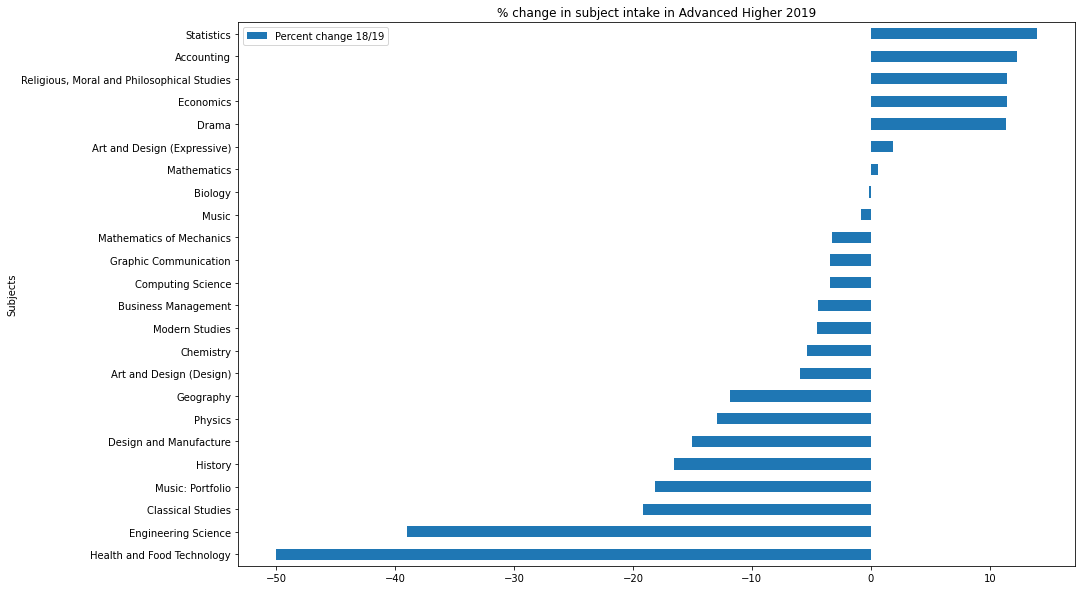

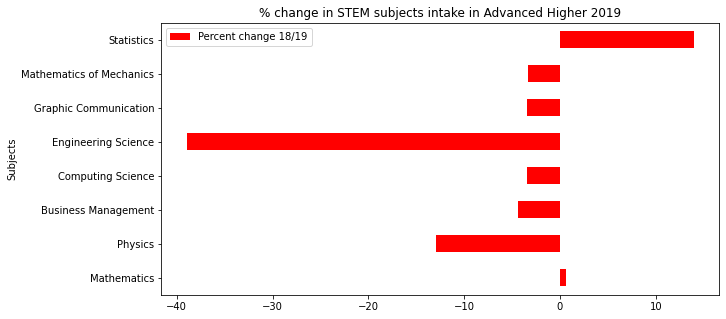

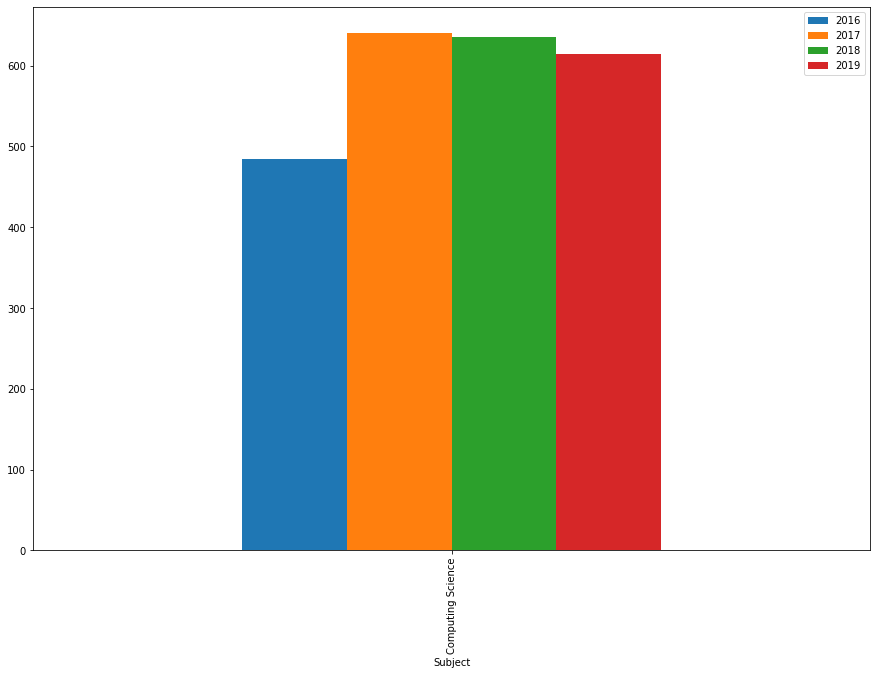

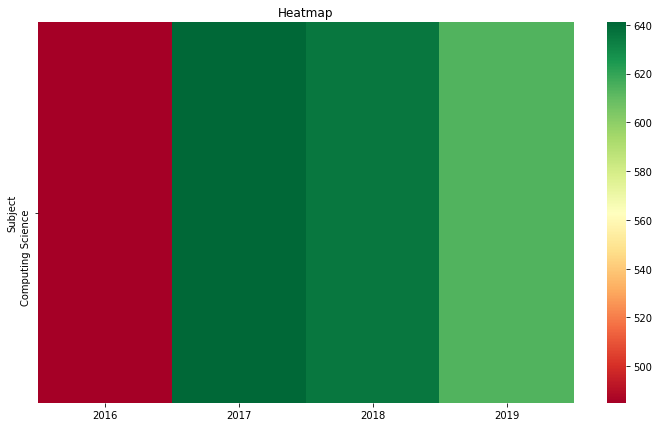

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flow
# 1. Read AH 2019 excel sheet, table 1
# 2. Last column shows percentage change b/w 2018 and 2019
# 3. Arrange in ascending order (most negative should come at the top)
# 4. Plot and highlight STEM/CS 

new_cnames = ['Subject', '2016', '2017', '2018', '2019', 'Percent change 18/19']
subject_lang = ['Latin', 'German', 'Spanish', 'French', 'English', 'Italian', 'Gaelic (Learners)', 'Gàidhlig', 'Chinese Languages', 'Physical Education']
# Subjects of interest (add all STEM related)
soi = ['Mathematics', 'Physics', 'Business Management', 'Computing Science', 'Engineering Science', 'Graphic Communication', 'Mathematics of Mechanics', 'Statistics']

def read_data_ah():
  # Read Advanced Higher stats for year 2019
  
  # Read sheet name = Table 1
  sheet_name = 'Table 1'
  
  ah_path = 'https://github.com/njaincode/final_project/blob/main/SQA_datasets/2019/ASR2019_AdvancedHigher.xls?raw=true'
  df = pd.read_excel(ah_path, sheet_name=sheet_name,header=None)
  return df

def clean_data(df, isyr19):
  
  # Data cleaning

  # Get 4 columns (there are no names, so use integer index)
  # Column 0 - Subject Title
  # Column 1:4 - 2016, 2017, 2018, 2019
  # Column 5 - % change 2018/2019
    
  #print(df.columns)
  if isyr19 == True:
    # From year 2019 there are more columns for unknown and NA
    df_c = df.iloc[:, [0,1,2,3,4,5]]
  else:
    df_c = df.iloc[:, [0,1,2,3,4,5]]

  # Remove top 8 rows to get to data of interest
  # First entry should be Accounting
  df_c.drop([0,1,2,3,4,5,6,7], inplace=True)
  df_c.reset_index(drop=True, inplace=True)
  
  # Have meaningful column names to work with
  column_indices = [0,1,2,3,4,5]
  old_names = df_c.columns[column_indices]
  df_c.rename(columns=dict(zip(old_names, new_cnames)), inplace=True)

  # Removed NA e.g. row 9 is empty
  df_c.dropna(inplace=True)
  df_c.reset_index(drop=True, inplace=True)

  # Remove Totals row
  # It happens to be the last, so just select all except last
  df_c = df_c[:-1]

  # Arrange in ascending order?
  #df_c.sort_values(by = ["Percent change 18/19"], ascending = [True], inplace=True)
  #print(df_c.head(10))
  df_c['Percent change 18/19'] = df_c['Percent change 18/19']*100
  return df_c

def plot_df(df):
  fig, ax = plt.subplots(1, 1, figsize=(15,10))
  
  df.plot(kind='barh', title='% change in subject intake in Advanced Higher 2019', ylabel='% change', xlabel='Subjects', ax=ax)
  plt.show()

def plot_heatmap(df):
  sub = ['Computing Science']
  #sub = ['Engineering Science']
  # To understand heatmap, plot simple bar graph first
  fig, ax = plt.subplots(1, 1, figsize=(15,10))
  df1 = df.loc[sub]
  df1.plot(kind='bar', ax=ax)

  title = "Heatmap"
  fig, ax = plt.subplots(1, 1, figsize=(12,7))
  plt.title(title, fontsize=12)
  
  #ax.set_xticks([])
  #ax.set_yticks([])
  #ax.axis('off')
  df1 = df.loc[sub]
  sns.heatmap(df1, fmt='', cmap='RdYlGn', ax=ax)
  plt.show()

def main_function():
  # Setup some display options
  pd.options.display.max_columns= 10
  pd.options.display.max_rows= 50

  # Fetch data for AH for year 2019
  df_ah = read_data_ah()

  dfc = clean_data(df_ah, isyr19=True)
  # Make a copy
  dfc1 = dfc
  dfc1.set_index('Subject', inplace=True)
  # Remove language subjects
  dfc1 = dfc1.drop(index=subject_lang, axis=0)
  dfc1.sort_values(by = ["Percent change 18/19"], ascending = [True], inplace=True)
  #print(dfc.shape)
  
  # To print
  dfp = dfc1[['Percent change 18/19']]
  plot_df(dfp)

  # Plot STEM subjects
  dfp = dfc.loc[soi]
  dfp = dfp[['Percent change 18/19']]
  fig, ax = plt.subplots(1, 1, figsize=(10,5))
  dfp.plot(kind='barh', title='% change in STEM subjects intake in Advanced Higher 2019', ylabel='% change', xlabel='Subjects', ax=ax, color='red')
  plt.show()
  
  # Just experimenting
  dfp = dfc.loc[soi]
  dfp = dfp[['2016', '2017', '2018', '2019']]
  plot_heatmap(dfp)


main_function()